#  Project Objective

Sentiment Analysis: What are the overall sentiments associated with each product? Are the reviews mostly positive or mostly negative?



# Project Summary

The sentiment analysis project focused on analyzing and classifying sentiments in customer reviews of a skin product.It began with data preprocessing  which involved removing stopwords, punctuation, and special characters, and applying tokenization, stemming, and lemmatization techniques. A Logistic Regression model was trained using the preprocessed data to predict sentiments as positive or negative. The model accurately predicted the sentiment for each review, providing valuable insights into the overall sentiment distribution of the skin product.

# importing Libraries

# Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Loading data into a DataFrame
df = pd.read_csv("Ulta Skincare Reviews.csv")

# Displaying the data.
print(f"Shape of df: {df.shape}\n")

df.head()

Shape of df: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


# Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [4]:
df.isnull().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [5]:
df.fillna('Uknown', inplace=True)

In [6]:
df.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [7]:
df["Review_Text"].value_counts(normalize=True)

I just used my fingers and rubbed mask on clean damp skin. Left on for 5 mins and then wet fingers and rubbed it into my skin and then rinsed off. My skin was left feeling so soft and smooth and looking great. The texture of the mask has little spheres and it smells great. I would definitely recommend giving it a try!              0.021446
Works great for all skin types!                                                                                                                                                                                                                                                                                                              0.021446
I've used this product a few times and I haven't noticed that it's exfoliating my skin much. I do notice that it's hydrating and leaves my face feeling fresh. I'll continue using this mask especially since with the colder temperatures my face will need the extra moisture                                             

In [8]:
df["Product"].value_counts()

Daily Superfoliant             1500
Daily Microfoliant             1500
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

In [9]:
import re
import string
def Review_Text(text):
    # Remove unwanted characters and symbols
    text = re.sub(r"[^a-zA-Z\s]", " ", text)  # Remove all non-alphabetic characters except spaces
    # Remove consecutive dots (...)
    text = re.sub(r"\.{2,}", " ", text)
    # Remove parentheses and their contents
    text = re.sub(r"\([^)]*\)", " ", text)
    # Remove exclamation marks
    text = text.replace("!", " ")
    # Remove numbers
    text = re.sub(r"\b\d+\b", " ", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [10]:
df['Review_Text_Lower'] = df['Review_Text'].apply(lambda x: x.lower())
df.head(3)


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Review_Text_Lower
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,love using this on my face while in the shower...
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,even better than the daily microfoliant. i'm o...
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,enjoy this product so much ! i look forward to...


 # stopword and tokenization


In [11]:
import spacy

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Define the set of stop words to remove
stop_words = nlp.Defaults.stop_words

# Tokenize each review using spaCy and remove any stop words
df['Review'] = df['Review_Text_Lower'].apply(lambda x: ' '.join([token.text for token in nlp(x) if token.text.lower() not in stop_words]))


# stemming


In [12]:
import nltk
from nltk.stem import PorterStemmer

In [13]:
ps = PorterStemmer()
def porterstemmer(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text
df['Review_stem'] = df['Review'].apply(porterstemmer)

 # Lemmatization


In [14]:
# Apply lemmatization to each tweet in the 'tweet_stem' column and store the result in a new column 'tweet_clean'
df['Review_clean'] = df['Review_stem'].apply(lambda x: ' '.join([token.lemma_.lower() for token in nlp(x) if not token.is_stop and not token.is_punct]))


In [15]:
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Review_Text_Lower,Review,Review_stem,Review_clean
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,love using this on my face while in the shower...,love face shower . heats gives light scrub nicely,love face shower . heat give light scrub nice,love face shower heat light scrub nice
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,even better than the daily microfoliant. i'm o...,better daily microfoliant . obsessed . skin sm...,better daili microfoli . obsess . skin smoother,well daili microfoli obsess skin smoother
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,enjoy this product so much ! i look forward to...,enjoy product ! look forward - feels great .,enjoy product ! look forward - feel great .,enjoy product look forward feel great
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,i've never tried anything like this before and...,tried like love . apply face little shot warm ...,tri like love . appli face littl shot warm fee...,tri like love appli face littl shoot warm feel...
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,this exfoliates very nicely and gives a very s...,exfoliates nicely gives smooth skin irritation...,exfoli nice give smooth skin irrit reaction sk...,exfoli nice smooth skin irrit reaction skin hi...


 # Biagramn


In [16]:
# Define your documents
docs = [nlp(text) for text in df['Review']]

def extract_bigrams(doc):
    bigrams = []
    for i in range(len(doc) - 1):
        if not (doc[i].is_stop or doc[i + 1].is_stop):
            bigram = f"{doc[i].lemma_} {doc[i + 1].lemma_}"
            bigrams.append(bigram)
    return bigrams

# Extract bigrams from each document
all_bigrams = []
for doc in docs:
    doc_bigrams = extract_bigrams(doc)
    all_bigrams.extend(doc_bigrams)

# Get the 50 most common bigrams
freq_dist = nltk.FreqDist(all_bigrams)
bigrams = freq_dist.most_common(50)

# Print the bigrams
for bigram in bigrams:
    print(bigram[0])


skin .
skin feel
product .
leave skin
. skin
! !
. love
sensitive skin
. use
make skin
face feel
feel soft
use .
. leave
skin look
dry skin
love product
. definitely
soft .
skin ,
product !
great .
smooth .
. product
5 minute
soft smooth
, take
leave face
feel clean
take 5
feel smooth
finger rub
feel like
definitely recommend
. make
love !
exfoliant .
face .
exfoliate skin
. receive
product ,
skin soft
love .
. ,
skin leave
work great
use daily
. notice
daily microfoliant
highly recommend


In [37]:
from wordcloud import WordCloud

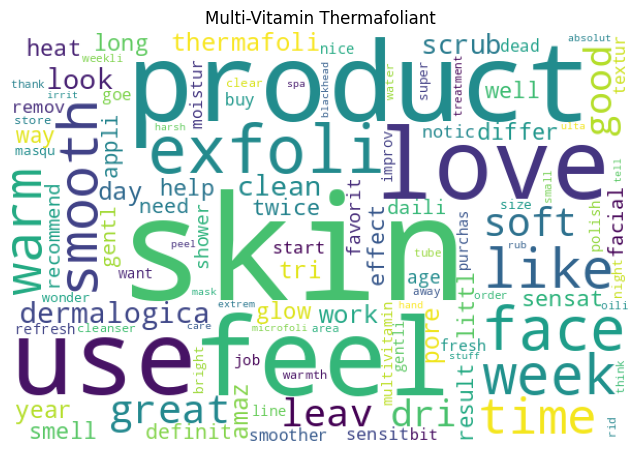

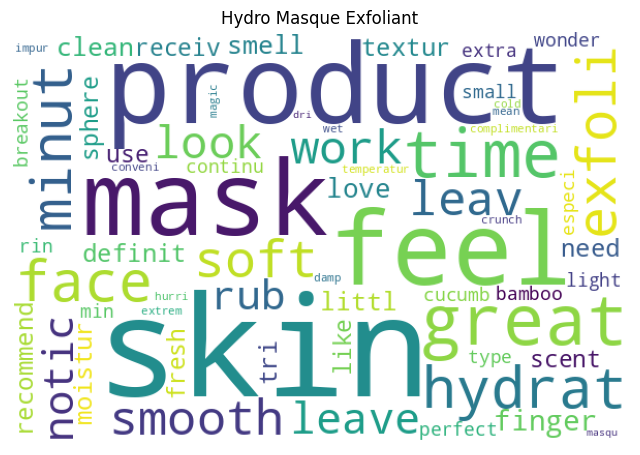

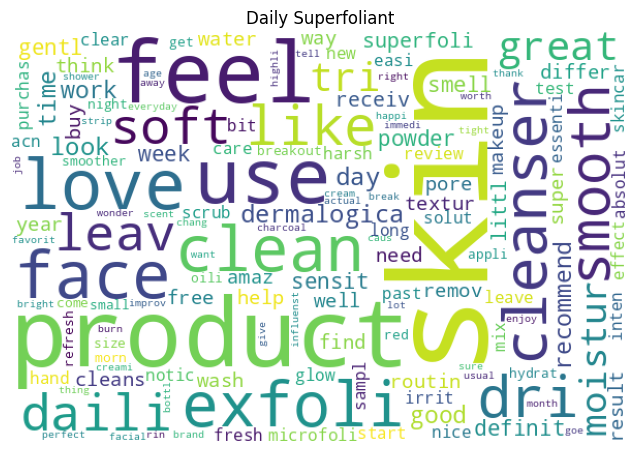

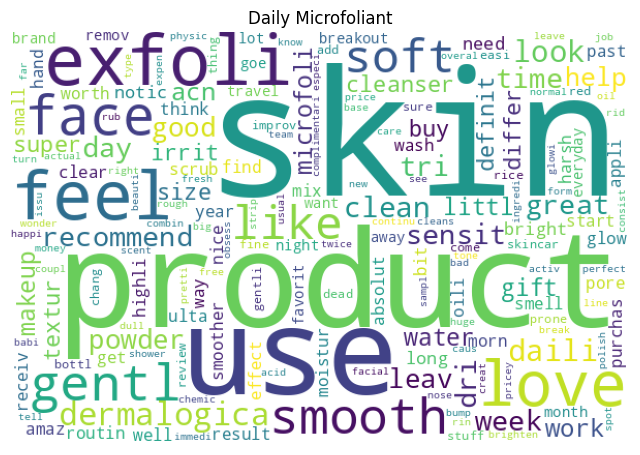

In [40]:
# Loop through each row of the DataFrame
for index, row in df.iterrows():
    # Get the product name and review text for this row
    product = row['Product']
    review = row['Review_clean']

    # Split the review text into individual words
    words = review.split()

    # Loop through each word in the review
    for word in words:
        # If the word has more than 2 characters
        if len(word) > 2:
            # If the product is not already in the dictionary, add it
            if product not in product_word_count:
                product_word_count[product] = {}

            # If the word is not already in the product's word count dictionary, add it with a count of 1
            if word not in product_word_count[product]:
                product_word_count[product][word] = 1
            # If the word is already in the product's word count dictionary, increment its count
            else:
                product_word_count[product][word] += 1
# Loop through each product's word count dictionary and create a word cloud
for product, word_count in product_word_count.items():
    wordcloud = WordCloud(width=600, height=400, background_color='white', colormap='viridis', min_font_size=10).generate_from_frequencies(word_count)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(product)
    plt.show()


 # Sentiment Analysis

In [17]:
from textblob import TextBlob

In [18]:


# Define a function to get sentiment polarity from a review
def get_sentiment(review):
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity
    if sentiment >= 0:
        return 'positive'
    else:
        return 'negative'

# Apply the function to each review in the DataFrame to generate a sentiment column
df['Sentiment'] = df['Review_clean'].apply(get_sentiment)
df.head()


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Review_Text_Lower,Review,Review_stem,Review_clean,Sentiment
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,love using this on my face while in the shower...,love face shower . heats gives light scrub nicely,love face shower . heat give light scrub nice,love face shower heat light scrub nice,positive
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,even better than the daily microfoliant. i'm o...,better daily microfoliant . obsessed . skin sm...,better daili microfoli . obsess . skin smoother,well daili microfoli obsess skin smoother,positive
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,enjoy this product so much ! i look forward to...,enjoy product ! look forward - feels great .,enjoy product ! look forward - feel great .,enjoy product look forward feel great,positive
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,i've never tried anything like this before and...,tried like love . apply face little shot warm ...,tri like love . appli face littl shot warm fee...,tri like love appli face littl shoot warm feel...,positive
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,this exfoliates very nicely and gives a very s...,exfoliates nicely gives smooth skin irritation...,exfoli nice give smooth skin irrit reaction sk...,exfoli nice smooth skin irrit reaction skin hi...,positive


In [22]:
# Create a new column called 'Sentiment_int' that maps 'positive' to 1 and 'negative' to 0
df['Sentiment_int'] = df['Sentiment'].map({'positive': 1, 'negative': 0})


In [30]:
df['Sentiment_int'].value_counts(normalize=True)

1    0.922651
0    0.077349
Name: Sentiment_int, dtype: float64

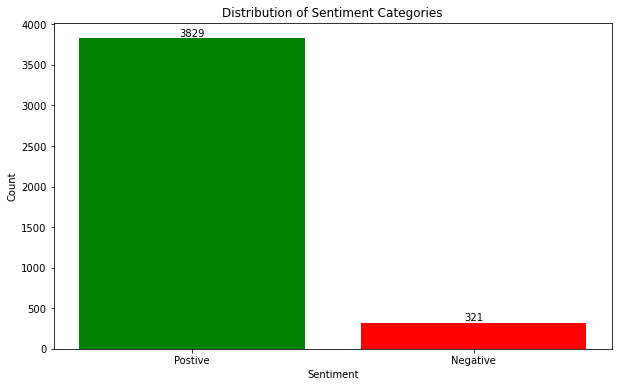

In [29]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Define custom colors for the bars
colors = ['green', 'red']

# Plot the sentiment counts as a bar chart with custom colors
plt.bar(['Postive', 'Negative'], sentiment_counts.values, color=colors)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Categories')

# Add text annotations with the actual counts
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
reviews =df['Review_clean']
# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the review text and transform it to a feature matrix
X = vectorizer.fit_transform(reviews)

# Print the feature matrix
print(X.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.48116392 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
# Define the feature matrix and target variable
X = df['Review']
y = df['Sentiment_int']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define the feature matrix and target variable
X = df['Review']
y = df['Sentiment_int']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data to a feature matrix
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data to a feature matrix
X_test = vectorizer.transform(X_test)

# Perform SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the value counts of the target variable after applying SMOTE
print(y_train_smote.value_counts())


1    3056
0    3056
Name: Sentiment_int, dtype: int64


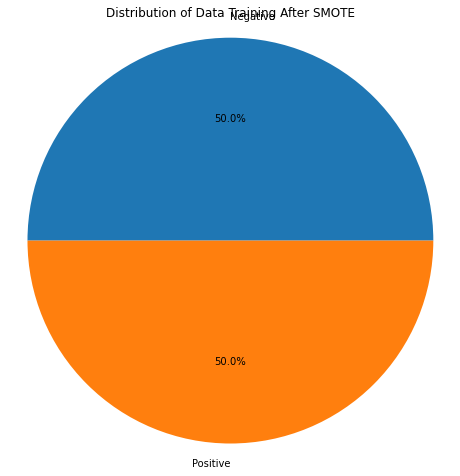

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))  # Adjust the figure size as per your requirement

# Your existing code
plt.pie(y_train_smote.value_counts(), labels=['Negative', 'Positive'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Distribution of Data Training After SMOTE')

plt.show()


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the logistic regression model on the SMOTE training data
logreg.fit(X_train_smote, y_train_smote)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.9289156626506024
Confusion Matrix:
[[ 33  24]
 [ 35 738]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.58      0.53        57
           1       0.97      0.95      0.96       773

    accuracy                           0.93       830
   macro avg       0.73      0.77      0.74       830
weighted avg       0.94      0.93      0.93       830



The accuracy metric indicates the overall correctness of the logistic regression model for sentiment analysis on the product review, with a value of approximately 92.89%. It means that around 92.89% of the reviews were correctly classified as either negative or positive.

The confusion matrix provides a detailed breakdown of the predictions made by the model:

True Negative (33): This represents the number of reviews that were actually negative sentiment and were correctly classified as negative by the model.

False Negative (24): This indicates the number of reviews that were actually negative sentiment but were incorrectly classified as positive by the model.

False Positive (35): This represents the number of reviews that were actually positive sentiment but were incorrectly classified as negative by the model.

True Positive (738): This indicates the number of reviews that were actually positive sentiment and were correctly classified as positive by the model.

The confusion matrix helps in assessing the performance of the logistic regression model by providing a more detailed understanding of the distribution of correct and incorrect predictions for each sentiment category

In [46]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of MultinomialNB
naive_bayes = MultinomialNB()

# Fit the Naive Bayes model on the SMOTE training data
naive_bayes.fit(X_train_smote, y_train_smote)

# Make predictions on the testing data
y_pred_nb = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Generate confusion matrix
confusion_mat_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(confusion_mat_nb)

# Generate classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:")
print(class_report_nb)


Naive Bayes Accuracy: 0.9156626506024096
Naive Bayes Confusion Matrix:
[[ 29  28]
 [ 42 731]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.51      0.45        57
           1       0.96      0.95      0.95       773

    accuracy                           0.92       830
   macro avg       0.69      0.73      0.70       830
weighted avg       0.93      0.92      0.92       830



The Naive Bayes model achieved an accuracy of approximately 91.57% on sentiment analysis of the product reviews.

The confusion matrix provides a detailed breakdown of the predictions made by the model:

True Negative (29): The model correctly classified 29 reviews as negative sentiment.
False Negative (28): The model incorrectly classified 28 reviews as negative sentiment when they were actually positive sentiment.
False Positive (42): The model incorrectly classified 42 reviews as positive sentiment when they were actually negative sentiment.
True Positive (731): The model correctly classified 731 reviews as positive sentiment.
The classification report summarizes the model's performance:

For the negative sentiment category, the precision is 0.41, recall is 0.51, and F1-score is 0.45.
For the positive sentiment category, the precision is 0.96, recall is 0.95, and F1-score is 0.95.

In [25]:
# Define the feature matrix and target variable
X = df['Review']
y = df['Sentiment_int']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data to a feature matrix
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data to a feature matrix
X_test = vectorizer.transform(X_test)

In [26]:

# Create an instance of Logistic Regression
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the sentiment for the test data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9518072289156626
Confusion Matrix:
 [[ 17  40]
 [  0 773]]


In [27]:
from sklearn.metrics import classification_report

# Predict the sentiment for the test data
y_pred = lr.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.30      0.46        57
           1       0.95      1.00      0.97       773

    accuracy                           0.95       830
   macro avg       0.98      0.65      0.72       830
weighted avg       0.95      0.95      0.94       830



The accuracy metric indicates the overall correctness of the logistic regression model for sentiment analysis on the product review, with a value of approximately 95.18%. It means that around 95.18% of the reviews were correctly classified as either positive or negative.

The confusion matrix breaks down the predictions made by the model into four categories:

True Negative (17): The number of reviews correctly classified as negative sentiment.

False Negative (40): The number of reviews that were actually positive sentiment but incorrectly classified as negative by the model.

False Positive (0): There were no negative reviews misclassified as positive sentiment.

True Positive (773): The number of reviews correctly classified as positive sentiment.

The confusion matrix helps in assessing the performance of the logistic regression model by providing a more detailed understanding of the distribution of correct and incorrect predictions for each sentiment category.




